In [1]:
import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd

# 1. Load data

In [2]:
mat = loadmat('data_ej2.mat')
df = pd.DataFrame(mat['date_power_speed'], columns=['date','power','wind_speed'])
df['date'] = pd.to_datetime(df['date']-719529, unit='D')
df

,date,power,wind_speed
0,2011-12-01 23:59:58.999995392,331.14374,5.9
1,2011-12-02 00:00:01.000004608,338.88751,5.8
2,2011-12-02 00:00:03.000003840,342.29999,5.7
3,2011-12-02 00:00:05.000003072,344.00626,5.8
4,2011-12-02 00:00:07.000002304,340.33124,5.8
...,...,...,...
3369595,2012-02-17 23:59:48.999999232,-12.60000,2.6
3369596,2012-02-17 23:59:50.999998464,-13.38750,2.6
3369597,2012-02-17 23:59:52.999997696,-12.46875,2.5
3369598,2012-02-17 23:59:54.999996928,-12.60000,2.5


# 2. When did the measurement campaign start? When did it finish?

In [3]:
start_date = df['date'].iloc[0]
end_date = df['date'].iloc[-1]

print('the measurement campaign start in: ', start_date)
print('the measurement campaign finish in: ', end_date)

the measurement campaign start in:  2011-12-01 23:59:58.999995392
the measurement campaign finish in:  2012-02-17 23:59:56.999996160


# 3. Which is the sampling frequency? (samples per minute)


In [4]:
# %%timeit
import datetime
delta_t = df['date'][1] - df['date'][0] # delta time between two measures
freq = round(datetime.timedelta(minutes=1)/delta_t, 0)
print("The sampling frequency is: ", freq, ' samples/minute')

The sampling frequency is:  30.0  samples/minute


# 4. Plot the power curve of the WT: wind speed (horizontal) VS power (vertical)

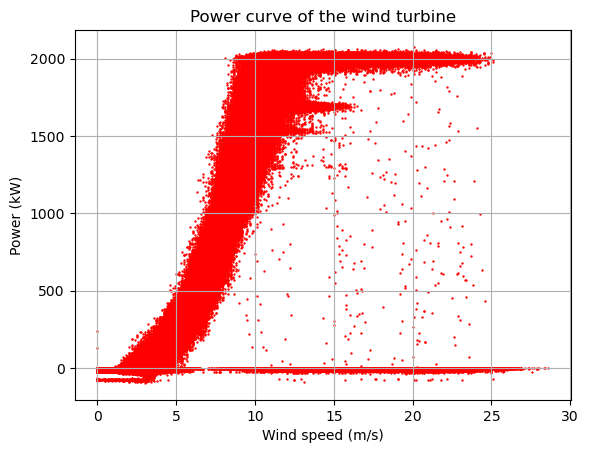

In [13]:
fig = plt.figure()
plt.scatter(df['wind_speed'], df['power'], color='r', s=0.5)
# fig.suptitle('test title')
plt.title('Power curve of the wind turbine')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Power (kW)')
plt.grid()
plt.show()

# 5. Filter positive values of power, and build a new plot

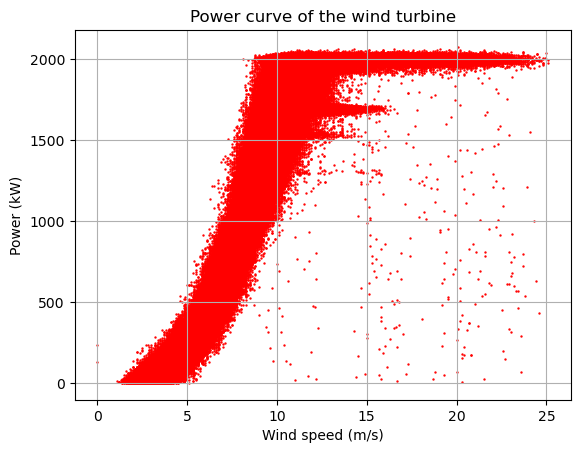

In [14]:
fig = plt.figure()
df_filtered = df.loc[df['power'] > 0]
plt.scatter(df_filtered['wind_speed'], df_filtered['power'], color='r', s=0.5)
# fig.suptitle('test title')
plt.title('Power curve of the wind turbine')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Power (kW)')
plt.grid()
plt.show()

# 6. Which is the nominal power of the WT?

In [15]:
print("The nominal power of the wind turbine is: ", max(df['power']), ' kW')

The nominal power of the wind turbine is:  2075.71875  kW


# 7. Which is the maximum wind speed recorded in the whole measurement campaign? Which is the power generated by the WT at this wind speed value? 

In [17]:
wind_speed_max = max(df['wind_speed']) 
index_wind_speed_max = df['wind_speed'].idxmax()

print('The maximum wind speed is : ', wind_speed_max, ' m/s')
print('The power of the wind turbine with the maximum wind speed is: ', df['power'][index_wind_speed_max], ' kW')

The maximum wind speed is :  28.6  m/s
The power of the wind turbine with the maximum wind speed is:  -1.8375  kW


# 8. In only one figure, plot the wind speed recorded in December, 24th 2011 VS wind speed in January, 24 th 2012.

In [18]:
df_filtered_24_decembre_2011 = df[(pd.to_datetime(df['date']).dt.year == 2011) & (pd.to_datetime(df['date']).dt.month == 12) & (pd.to_datetime(df['date']).dt.day == 24)] 
df_filtered_24_january_2012 = df[(pd.to_datetime(df['date']).dt.year == 2012) & (pd.to_datetime(df['date']).dt.month == 1) & (pd.to_datetime(df['date']).dt.day == 24)] 
    
df_filtered_24_decembre_2011["date_hour"] = df_filtered_24_decembre_2011['date'].dt.strftime('%H:%M')
df_filtered_24_january_2012["date_hour"] = df_filtered_24_january_2012['date'].dt.strftime('%H:%M') # %H:%M:%S

C:\Users\Usser\AppData\Local\Temp\ipykernel_20908\2061590432.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_24_decembre_2011["date_hour"] = df_filtered_24_decembre_2011['date'].dt.strftime('%H:%M')
C:\Users\Usser\AppData\Local\Temp\ipykernel_20908\2061590432.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_24_january_2012["date_hour"] = df_filtered_24_january_2012['date'].dt.strftime('%H:%M') # %H:%M:%S


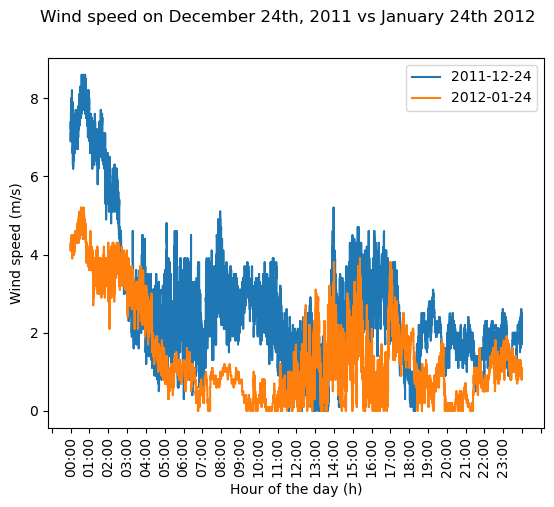

In [58]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots()
fig.suptitle('Wind speed on December 24th, 2011 vs January 24th 2012')

ax.plot(df_filtered_24_decembre_2011['date_hour'], df_filtered_24_decembre_2011['wind_speed'], label='2011-12-24')
ax.plot(df_filtered_24_january_2012['date_hour'], df_filtered_24_january_2012['wind_speed'], label='2012-01-24')
ax.xaxis.set_major_locator(ticker.MaxNLocator(30))      

plt.xlabel('Hour of the day (h)')
plt.ylabel('Wind speed (m/s)')
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
plt.legend()
plt.show()